# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# command to tell python to actually display the graphs
%matplotlib inline

# restrict float values to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [ ]:
# mounting drive at google colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# read in the data
path='/content/drive/MyDrive/Data/foodhub_order.csv'
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds relates to food orders placed by customers.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# checking the number of rows and columns in the dataset
num_rows_columns = df.shape
print('There are', num_rows_columns[0], 'rows and', num_rows_columns[1], 'columns.')

There are 1898 rows and 9 columns.


#### Observations:
*  There are **1,898** rows
*  There are **9** columns


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [ ]:
# Use info() to print a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* This function confirms that there are 1,898 rows of data and 9 columns
* There are 5 numeric data types and 4 object data types
* The **rating** column data type could be converted to an *integer* data type (or done so with a new column)
* The **cost_of_the_order** column is appropriately assigned with the *float* data type
* There are no rows/columns with missing values


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [ ]:
# checking for nul values
print(df.isnull().sum())

# Alternate DataFrame showing counts of missing values and percentages
pd.DataFrame({'Count':df.isnull().sum() [df.isnull().sum()>=0], 'Percentage':(df.isnull().sum()[df.isnull().sum()>=0]/df.shape[0])*100})

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


,Count,Percentage
order_id,0,0.000
customer_id,0,0.000
restaurant_name,0,0.000
cuisine_type,0,0.000
cost_of_the_order,0,0.000
day_of_the_week,0,0.000
rating,0,0.000
food_preparation_time,0,0.000
delivery_time,0,0.000


#### Observations:

* There are no missing values in the data set.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# function to generate summary statistics of the data set
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000,1898.000,1898.000,1898.000,1898.000
mean,1477495.500,171168.478,16.499,27.372,24.162
std,548.050,113698.140,7.484,4.632,4.973
min,1476547.000,1311.000,4.470,20.000,15.000
25%,1477021.250,77787.750,12.080,23.000,20.000
50%,1477495.500,128600.000,14.140,27.000,25.000
75%,1477969.750,270525.000,22.297,31.000,28.000
max,1478444.000,405334.000,35.410,35.000,33.000


#### Observations:
* The **minimum** time for food to be prepared is **20** minutes.
* The **average** (mean) time for food to be prepared is **27.372** minutes.
* The maximum time for food to be prepared is **35** minutes.


### **Question 5:** How many orders are not rated?

In [ ]:
# getting a count of the number of order which are not rated.
print(df['rating'].value_counts(),'\n')

# fetch the percentage of values present in the data
df['rating'].value_counts(normalize=True)*100



Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64 



Not given   38.778
5           30.980
4           20.337
3            9.905
Name: rating, dtype: float64

#### Observations:
* There is a value present in the ratings column for each row in the data, however, the value 'Not given' represents an order for which a rating was not given.
* There are **736** total orders that did *not* receive a rating. This represents almost **39%** of the ratings data.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

**Note:** We'll use a combination of boxplots, histograms, and/or violin plots to visualize single-variable data points and their distributions.

####Order ID

In [ ]:
# check to see if there are any duplicate order id's
print(df['order_id'].duplicated().sum())

# check to see the number of unique values for all orders
df['order_id'].nunique()

0


1898

#####Observations:
* There are **1,898** unique order id's. This is consistent with having one order ID per order and having no duplicate or erroneous order ID's present in the data set.

####Customer ID

In [ ]:
# check to see the number of unique values for all customer ID's
print(df['customer_id'].nunique())

# check to see if there are any duplicate customer id's
print(df['customer_id'].duplicated().sum(), '\n')

# check the top 5 repeat customers
df.groupby('customer_id').size().sort_values(ascending=False).head(5)






1200
698 



customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
dtype: int64

#####Observations:
* There are **1,200** unique customer ID's (but **1,898** orders). This seems fine because it indicates that some customers have placed more than one order.
* We can see that there *are* duplicative orders based on customer ID's (698 of them)
* We can also see the top 5 customers based on the frequency of duplicate customer_id's.

####Restaurant Name

In [ ]:
# check to see the number of unique values for all restaurants
df['restaurant_name'].nunique()

178

#####Observations:
* There are **178** restaurants represented within the data set

####Cuisine Type

In [ ]:
# check the number of unique values in the data for the 'cuisine_type' column
df['cuisine_type'].nunique()
print(df['cuisine_type'].nunique())

# Check what specific values are present in the 'cuisine_type' column
print(df['cuisine_type'].unique())

14
['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


#####Observations:
* There are **14** types of cuisine in the data set.
* We can use the unique() function to see the different types

####Cost of the Order
Let's create a function to calculate the number of bins we should use with histograms

In [ ]:
# Creating a function to determine the optimal # of bins for use in a histogram
def binsize(df,row_name):
  import math
  df_stats = df.describe(include='all').T
  df_stats = df_stats.reset_index()
  ## determining binwidth
  top75 = df_stats[df_stats['index'] == row_name]['75%'].values[0]
  top25 = df_stats[df_stats['index'] == row_name]['25%'].values[0]
  IQR = (top75 - top25)
  print("IQR =", IQR)
  IQR2 = 2*IQR
  num_rows = df.shape[0]
  print("n =", num_rows)
  cube_root = math.pow(num_rows, 1/3)
  binwidth = IQR2/cube_root
  print('Binwidth =', binwidth)
  ## determining number of bins ##
  max = df_stats[df_stats['index'] == row_name]['max'].values[0]
  min = df_stats[df_stats['index'] == row_name]['min'].values[0]
  range = max - min
  print("Range =", range)
  bins = range/binwidth
  print('You need', bins, 'bins')
  return bins

# This is an alternate function (note that the 'rows' input takes the # of rows in the dataset)
def binsize2(IQR,rows,range):
  import math
  iqr_v = 2*IQR
  cube_root = math.pow(rows,1/3)
  binwidth = iqr_v/cube_root
  bins = range/binwidth
  print('You need', bins, 'bins')

IQR = 10.2175
n = 1898
Binwidth = 1.650476098152262
Range = 30.939999999999998
You need 18.74610606881123 bins


[Text(0.5, 1.0, 'Count of Cost per Order'),
 Text(0.5, 0, 'Cost (dollars)'),
 Text(0, 0.5, 'count (orders)')]

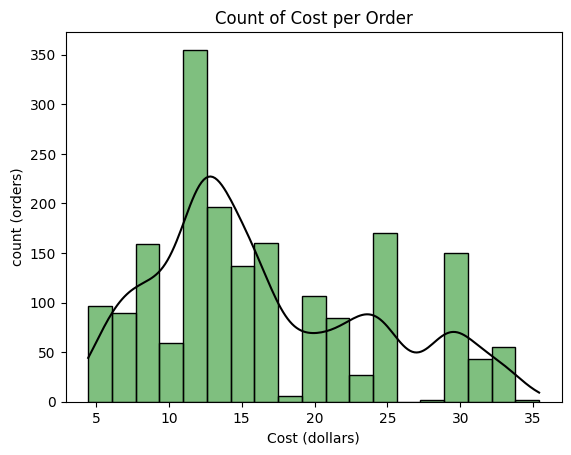

In [ ]:
# Calculating the ideal number of bins
binsize(df,'cost_of_the_order')

# Create a histogram of the cost of the order
order_cost = sns.histplot(data=df,x='cost_of_the_order', bins=19, color='green', kde=True);
order_cost.lines[0].set_color('black')
order_cost.set(title='Count of Cost per Order', xlabel='Cost (dollars)', ylabel='count (orders)')

In [ ]:
# this code was adjusted to find the gap between orders.
df.loc[(df['cost_of_the_order'] > 25.270) & (df['cost_of_the_order'] < 28.570)]


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


#####Observations:
* Most frequently, the cost of an order is between \$11 and \$16 dollars
* There is a gap somewhere between \$25 and \$30 dollars where very few orders were placed (but many orders placed at higher price points.
* The Kernel Density Line indicates some right skewness in the data

* There were no orders placed between the costs of \$25.270 and \$28.570. Is this an anomaly?

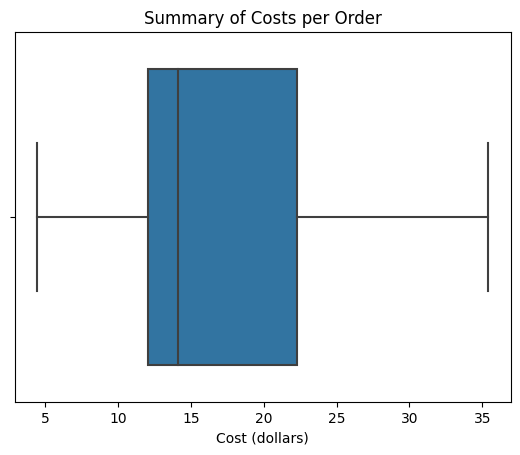

In [ ]:
# Creating a boxplot of the cost_of_the_order column
order_cost = sns.boxplot(data=df,x='cost_of_the_order');
order_cost.set(title='Summary of Costs per Order', xlabel='Cost (dollars)');

Observations:

* Most frequently, the cost of an order is about \$14.
* The box plot shows that the data set is skewed to the right.
* There's no indication of outliers in the data set.
* The minimum cost of the order is around \$5, and maximum cost is around \$35
* Half of the orders cost between ~ \$12 and \$22 dollars

####Day of the Week


In [ ]:
# check the number of unique values for the day of the week column
print(df['day_of_the_week'].nunique())

# print the values of the 'day_of_the_week' column
print(df['day_of_the_week'].unique())


2
['Weekend' 'Weekday']


#####Observations:
* There are **2** values present in the data set for 'day_of_the_week'. They are: *Weekend* and *Weekday*

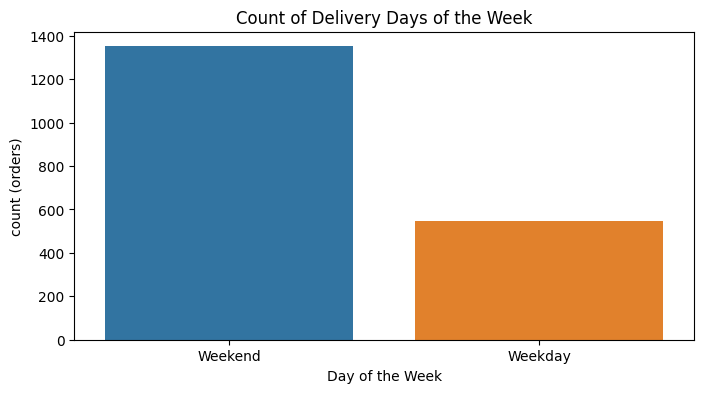

In [ ]:
# create a count plot for the day_of_the_week column
plt.figure(figsize=(8,4))
dayweek_plt = sns.countplot(data=df, x='day_of_the_week')
dayweek_plt.set(title='Count of Delivery Days of the Week', xlabel='Day of the Week', ylabel='count (orders)');

In [ ]:
;# get the counts of orders for 'day_of_the_week'
print(df['day_of_the_week'].value_counts(),'\n')

# create a variable for each of the values (e.g. 'Weekend', and 'Weekday')
weekend_count = (df[df['day_of_the_week'] == 'Weekend'].shape[0])
weekday_count = (df[df['day_of_the_week'] == 'Weekday'].shape[0])

# print the avg daily order for both weekdays and weekends
print('There is an avg of ', weekend_count/2, ' orders placed per day on the weekend. This represents', f"{weekend_count/df.shape[0]*100:.2f}", '% of total orders.')
print('There is an avg of ', weekday_count/5, ' orders placed per day on weekdays. This represents', f"{weekday_count/df.shape[0]*100:.2f}", '% of total orders.')




Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64 

There is an avg of  675.5  orders placed per day on the weekend. This represents 71.18 % of total orders.
There is an avg of  109.4  orders placed per day on weekdays. This represents 28.82 % of total orders.


#####Observations:
* We can observe that there have been more than twice as many orders placed on the weekend as were placed during weekdays.
* **Note:** weekday orders are represented over 5 days, whereas weekend orders are represented by only two days. Thus: while it appears that the difference between these two categories is around 2.5x, the real difference is that the business receives more than 6x the number of orders *per day* on weekends (than it receives on weekdays).

####Rating

In [ ]:
# check the number of unique values for ratings
print(df['rating'].nunique())

# check the actual values used within the ratings column
print(df['rating'].unique())

4
['Not given' '5' '3' '4']


#####Observations:
* As previously discussed, the value **'Not given'** is used when an order was not rated
* We observe that there are no **'1'** or **'2'** ratings within the 1-5 rating scale

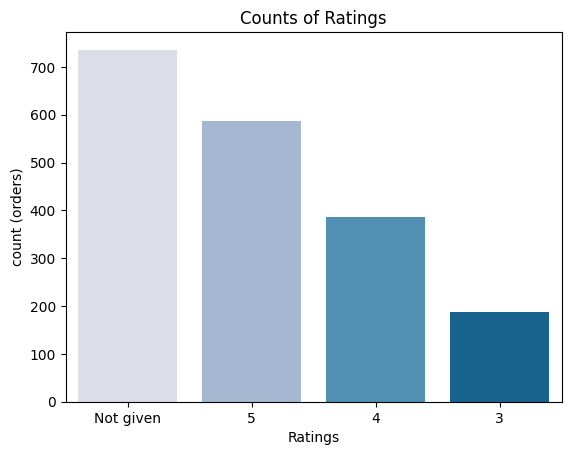

In [ ]:
ratingplt = sns.countplot(data=df, x='rating', order=('Not given', '5', '4', '3'), palette='PuBu')
ratingplt.set(title='Counts of Ratings')
ratingplt.set(xlabel='Ratings', ylabel='count (orders)')
plt.show()

In [ ]:
# Let's create a new DataFrame that only shows orders which were rated
df_ratings = df.copy()
df_ratings['rating_new'] = df_ratings['rating']

# filtering out rows where the 'rating' value = 'Not given'
df_ratings = df_ratings[df_ratings['rating_new'] != 'Not given']
total_ratings = df_ratings['rating_new'].count()

print('\n'+'Out of', f"{df.shape[0]:,}", 'total orders,', f"{total_ratings:,}", 'were rated by customers.')
print('That\'s', f"{total_ratings/df.shape[0]*100:.2f}", 'percent.' )



Out of 1,898 total orders, 1,162 were rated by customers.
That's 61.22 percent.


#####Observations:
* Was can see that 61.2% of the orders were rated by customers
* Of the orders which were rated, the majority of the ratings were '5', followed by '4', followed by '3'
* There are approximately 200 less '4' ratings than there are '5'; and there are approximately 200 less '3' ratings than there are '4'. With less than 200 '3' ratings, this trend might explain why we don't yet see any '2' or '1' ratings. We'd keep this in mind as we explore further
* Generally, the ratings that have been given reflect positively on the orders

####Food Preparation Time

IQR = 8.0
n = 1898
Binwidth = 1.2922739207455929
Range = 15.0
You need 11.607446191706455 bins


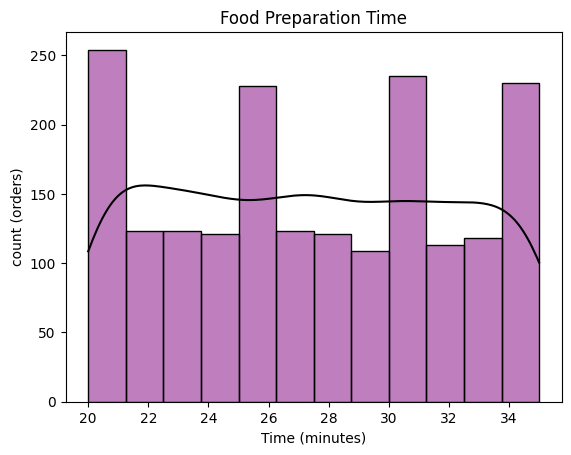

In [ ]:
# calculating the ideal number of bins for the food preparation histogram
binsize(df,'food_preparation_time')

# creating a histogram for the food_preparation_time column
food_prep = sns.histplot(data=df, x='food_preparation_time', color='purple', bins=12, kde=True)
food_prep.set(title='Food Preparation Time', xlabel='Time (minutes)', ylabel='count (orders)')
food_prep.lines[0].set_color('black');

#####Observations:
* There does not appear to be much skewness in this data which would suggest that the mean food preparation time lies in the middle of this graph (~27 min) - which is supported by the statistical summary.
* The lack of skewness probably indicates consistency. In term of business problems, the next question might be: "is the business consistently fast or consistently slow within the industry/market"?

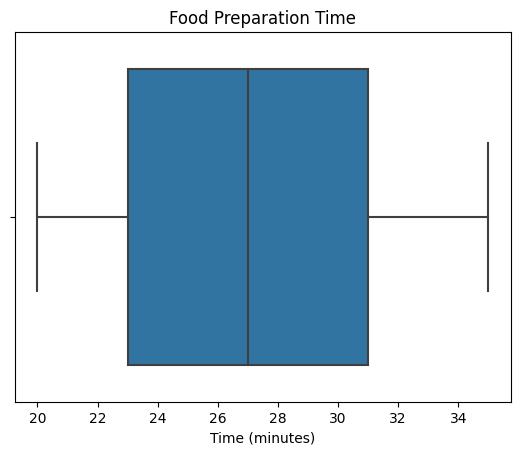

In [ ]:
# create a boxplot for food preparation time
sns.boxplot(data=df, x='food_preparation_time').set(title='Food Preparation Time', xlabel='Time (minutes)');


#####Observations:
* Again, we see a fairly balanced boxplot with a median line centered on the IQR (~27 minutes). The right whisker indicates a very slight (right) skewness. This probably means that a *few* orders took an uncharacteristically long amount of time to prepare.
* Even in a consistent environment, we'd expect some internal/external factors to produce variance like this.
* The right-skewness makes sense because it would be most likely to have *delays* within the preparation process (than to have shortcuts that inconsitently shorten the preparation time).

####Delivery Time

IQR = 8.0
n = 1898
Binwidth = 1.2922739207455929
Range = 18.0
You need 13.928935430047744 bins


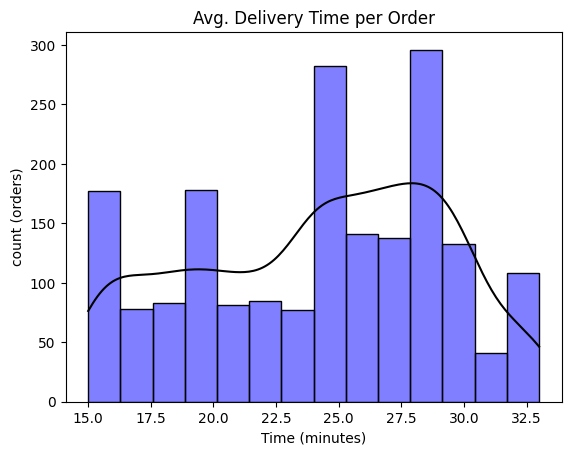

In [ ]:
# determine the ideal number of bins for the delivery time histogram
binsize(df,'delivery_time')

# Create a histogram for the delivery_time column
del_time = sns.histplot(data=df,x='delivery_time', color='blue', bins=14, kde='True')
del_time.set(title='Avg. Delivery Time per Order', xlabel='Time (minutes)', ylabel='count (orders)')
del_time.lines[0].set_color('black');

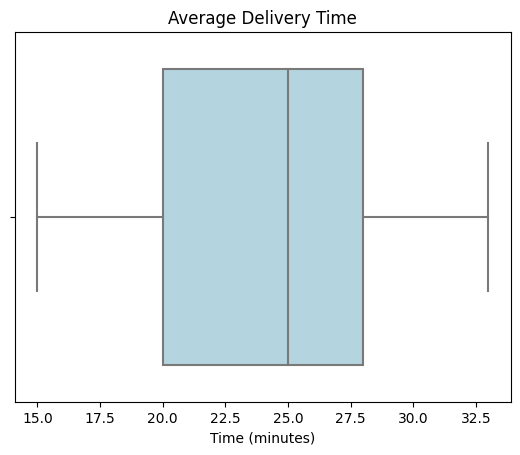

In [ ]:
# Create a boxplot for the delivery_time column
del_time = sns.boxplot(data=df, x='delivery_time', color='lightblue')
del_time.set(title='Average Delivery Time', xlabel='Time (minutes)');

#####Observations:
* We see that the delivery_time data is left-skewed. This means there are fewer data points on the left side of the median.
* The density line of the histogram shows that most of the data points lie between ~ 24 and 29 minutes
* Most meals are delivered within 25 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# fetch the top five restaurants with the most iorders received
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#####Observations:
* The top 5 restaurants (most orders received) are:
  1. Shake Shack
  2. The Meatball Shop
  3. Blue Ribbon Sushi
  4. Blue Ribbon Fried Chicken
  5. Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# create a variable with data set filtered to 'Weekend'
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekday = df[df['day_of_the_week'] == 'Weekday']

# display the most popular cuisine within the filtered data set
print('Weekends:\n', df_weekend['cuisine_type'].value_counts().head(14), sep='')
print('')
print('Weekdays:\n', df_weekday['cuisine_type'].value_counts().head(14), sep='')

# creating these variables allows us to reference any position in the ordered list
# We want to show the cuisine with the most orders (index = 0)
sorted_cuisine_0 = df_weekend['cuisine_type'].value_counts().sort_values(ascending=False).index
sorted_cuisine_1 = df_weekday['cuisine_type'].value_counts().sort_values(ascending=False).index
print('\nThe most popular cuisine type on the weekend is',sorted_cuisine_0[0]+'.')
print('\nThe most popular cuisine type on the weekday is',sorted_cuisine_1[0]+'.')




Weekends:
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

Weekdays:
American          169
Japanese          135
Italian            91
Chinese            52
Mexican            24
Indian             24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Thai                4
Vietnamese          3
Korean              2
Spanish             1
Name: cuisine_type, dtype: int64

The most popular cuisine type on the weekend is American.

The most popular cuisine type on the weekday is American.


#####Observations:
* The most popular cuisine on the weekend is **American**.
* The most popular cuisine on the weekday is also **American**.
* The data shows that the top 6 cuisines are the same for both Weekends and Weekdays but they diverge thereafter. This might not mean much since we don't have data describing popularity by individual days or meal times (i.e. breakfast, lunch, dinner)


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# get total amount of orders
total_orders = df.shape[0]
# find orders that cost more than $20 dollars
orders_above_20 = df[df['cost_of_the_order']>20]
# find order that cost $5 or less
orders_below_5 = df[df['cost_of_the_order']<=5]


# print number of total orders that cost more than $20 dollars
print('Out of', f"{total_orders:,}", 'total orders,', orders_above_20.shape[0], 'cost more than $20 dollars.', orders_below_5.shape[0], 'cost $5 or less.')

# Calculate the percentage of orders that cost more than $20 dollars
percentage20 = (orders_above_20.shape[0] / df.shape[0]) * 100
percentage5 = (orders_below_5.shape[0] / df.shape[0]) * 100

print("Percentage of orders above $20 dollars:", str(round(percentage20, 2))+'%')
print("Percentage of orders at $5 or less:", str(round(percentage5, 2))+'%')

Out of 1,898 total orders, 555 cost more than $20 dollars. 9 cost $5 or less.
Percentage of orders above $20 dollars: 29.24%
Percentage of orders at $5 or less: 0.47%


#####Observations:
* Out of 1,898 total orders, **29.24%** cost more than \$20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# find the mean of the delivery_time column
mean_del_time = df['delivery_time'].mean()
''' This could also be retrieved from the summary
statistics with:

mean_del_time = (df.describe().iloc[1,4])

but may produce a rounding error when being
used in calculations.
'''

# Convert the float value of the mean to minutes and seconds
whole_minutes, remainder = divmod(mean_del_time, 1)
whole_minutes=int(whole_minutes)
seconds = remainder * 60
seconds=int(seconds)

# displaying the mean value (float)
print(f"The mean delivery time is \033[1m{round(mean_del_time, 2)}\033[0m minutes")

# displaying the mean value in integers
print(f'That equates to \033[1m{whole_minutes} minutes\033[0m and \033[1m{seconds} seconds.\033[0m')

The mean delivery time is 24.16 minutes
That equates to 24 minutes and 9 seconds.


#####Observations:

* The mean delivery time is **24 minutes** and **9 seconds** (24.16 minutes).



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# get value counts for top three customers
top_cust = df['customer_id'].value_counts().head(3)

# loop to print top customers by ID and order counts
for customer, count in top_cust.items():
    print('Customer ID:', customer, 'had', count, 'orders.')

Customer ID: 52832 had 13 orders.
Customer ID: 47440 had 10 orders.
Customer ID: 83287 had 9 orders.


#####Observations:


The following customers are the most 'frequent':
  1. 52832 (13 orders)
  2. 47440 (10 orders)
  3. 83287 (9 orders)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


####Cuisine vs Cost of Order

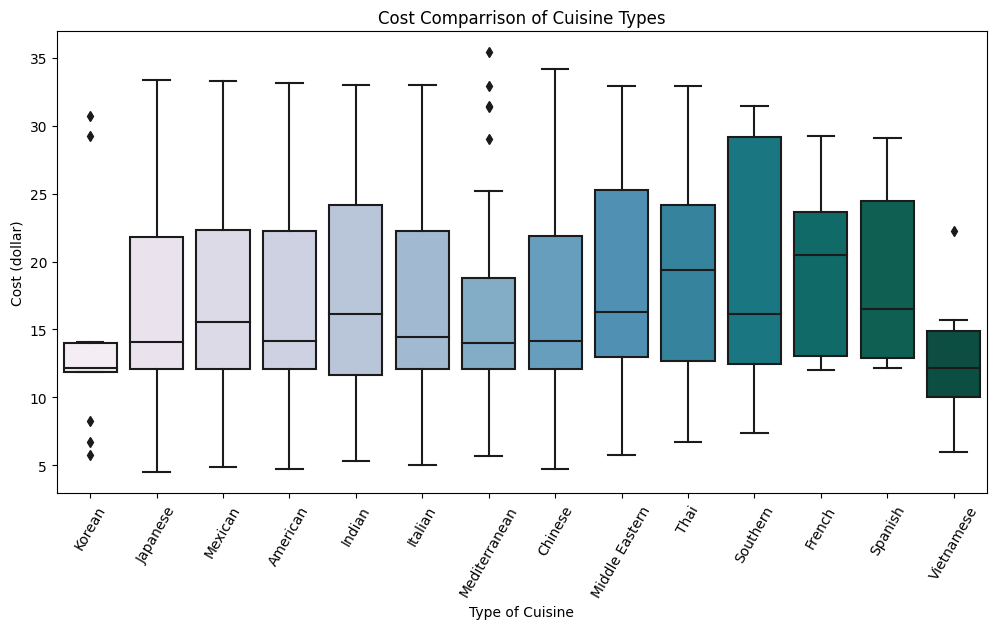

In [ ]:
# Checking relationship between cost of the order and cuisine type
plt.figure(figsize=(12,6))
cuisine_cost = sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette='PuBuGn')
plt.xticks(rotation = 60)
cuisine_cost.set(title='Cost Comparrison of Cuisine Types', xlabel='Type of Cuisine', ylabel='Cost (dollar)')
plt.show()


#####Observations:

*  Thai and French cuisines tends to be the *most* expensive type of order (based on central tendancy)
*  Vietnamese and Korean cuisines tend to be the *least* expensive orders
*  Every cuisine type *except for French and Thai* are right-skewed.
*  The two most expensive cuisines are left-skewed and are both the most expensive cuisines according to dentral tendancy
* Outliers are present in Korean, Mediterrainian, and Vietnamese cuisine orders
* Southern cuisine has the most variance within the inner quartile range (IQR)
* Korean cuisince has the least amount of variance with the inner quartile range (IQR), however, it has the most outliers in the data.


**Let's check how many total orders we have for Korean cuisine:**

In [ ]:
# get total number of orders with Korean cuisine type
df['cuisine_type'].value_counts().get('Korean', 0)


13

* Out of the 1,989 total orders, only 13 of them are for Korean food. Therefore,we may not have enough data to support conclusions about this food type. This raises additional questions: **What is the distrubution of cuisine types across the total number of orders?**

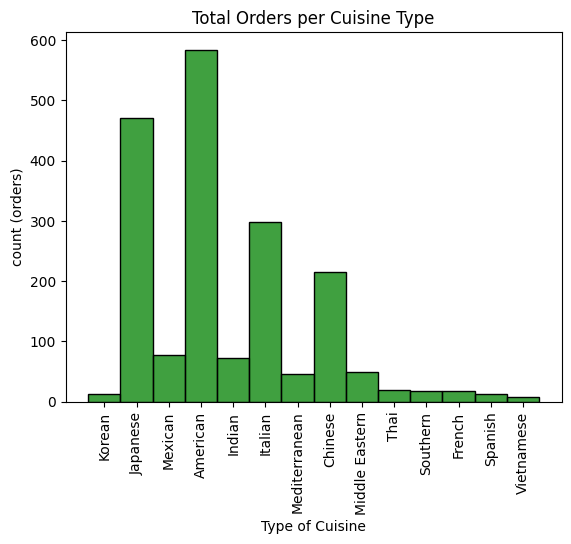

In [ ]:
# create histogram for cuisines type vs total orders
cuisine_order_count = sns.histplot(data=df,x='cuisine_type', color='green')
cuisine_order_count.set(title='Total Orders per Cuisine Type', xlabel='Type of Cuisine', ylabel='count (orders)')
plt.xticks(rotation=90);

In [ ]:
# How much of the data is represented by the top 4 cuisines?
# Let's see how many orders are represented by the top 4 cuisines
top_4_cuisines = df['cuisine_type'].value_counts().head(4).sum()

# Get the number of orders that are not represented by the top 4 cuisines
not_top_4_cuisines = df.shape[0] - top_4_cuisines


# calculate the percentage of orders that are represented by the top 4 cuisines
print('The top 4 cuisine types represent', f"{100 - (not_top_4_cuisines/top_4_cuisines*100):.2f}", '% of the total orders.')

The top 4 cuisine types represent 78.88 % of the total orders.



#####Observations:
*  Only 21% of the orders were made for cuisines types other than Japanese, American, Italian, or Chinese.
* There may not be enough data to accurately decsribe trends within these types of cuisine.
* Considering this, reviewing the box plots for cuisine types vs price of order for the 4 most popular cuisine types shows them to look almost identical.

In [ ]:
# compare popularity of cuisine type (based on order count) with the total revenue of orders by cuisines type
print(df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14),'\n')

# show number of orders by cuisine
df['cuisine_type'].value_counts().head(14)

cuisine_type
American         9530.780
Japanese         7663.130
Italian          4892.770
Chinese          3505.620
Mexican          1303.850
Indian           1235.140
Middle Eastern    922.210
Mediterranean     711.840
Thai              364.950
French            356.290
Southern          328.110
Spanish           227.930
Korean            182.020
Vietnamese         90.180
Name: cost_of_the_order, dtype: float64 



American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

#####Observations:

* We can see that American cuisine (which is the most popular cuisine) also has the highest revenue (\$9,530.78)
* We can also observe that the ranking of revenue by cuisines type is the exact same ranking in popularlity (based on the number of orders)
* This suggests that there may not be much price difference between cuisine types after all

####Cuisine vs Food Preparation Time

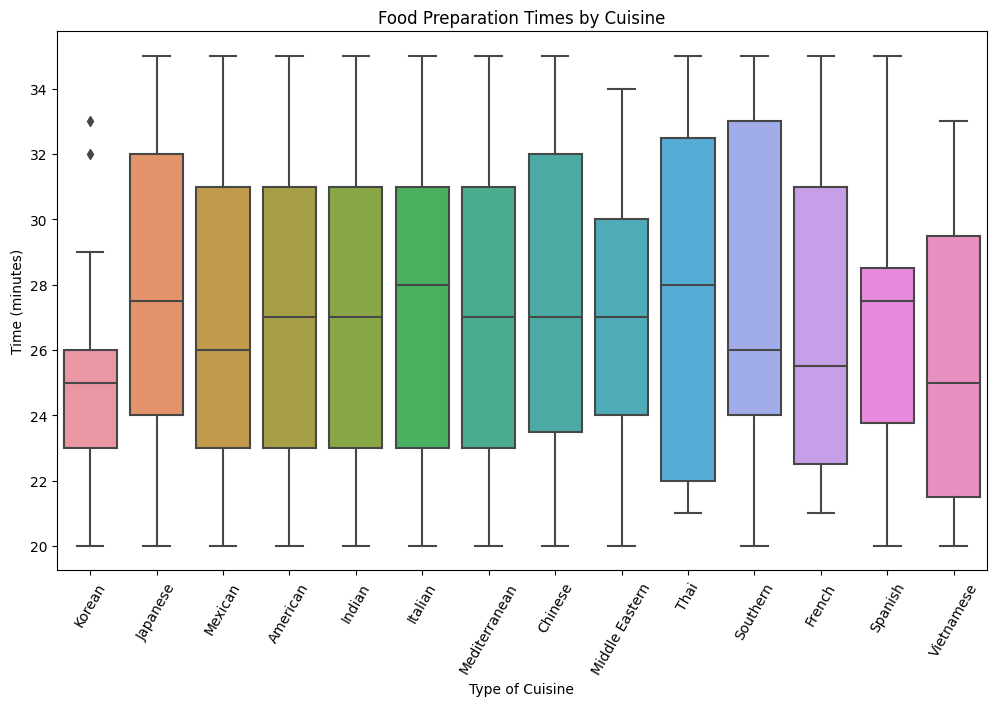

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(12,7))
prep_cuisine = sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
prep_cuisine.set(title='Food Preparation Times by Cuisine', xlabel='Type of Cuisine', ylabel='Time (minutes)')
plt.xticks(rotation = 60)
plt.show()

#####Observations:
* The four most common cuisine types look to have very similar preparation times and variances.
* None of the cuisines have shown that they can be prepared in less than 20 minutes
* Most of the cuisines have demonstrated that they can take as long as 35 minutes to prepare
* Thai food has the most variance in prep time
* left-skewed data in this section indicates that the majority of data points are located at longer times within the variance and right-skewed data indicates that most data points are clustered at shorter times within the variance.
* Korean cuisine has outliers at longer ends of the timescale. With only a handful of Korean order data points, these should probably be viewed at legitimate data points as the preparation times fall within normal times of other cuisine types. We would not treat these points as outliers.

####Day of the Week vs Delivery Time

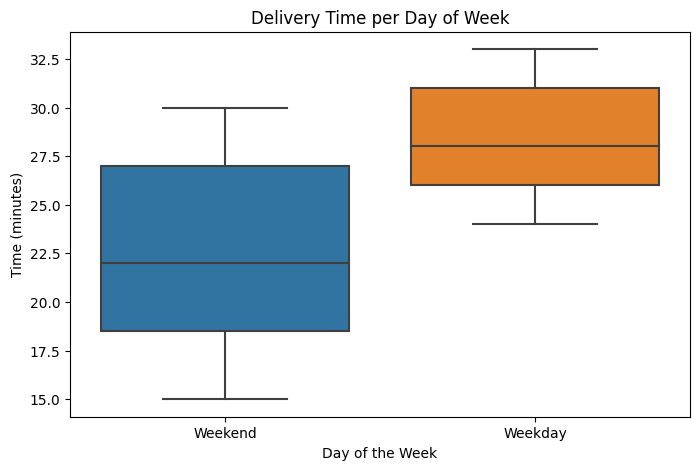

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(8,5))
d_time = sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
d_time.set(title='Delivery Time per Day of Week', xlabel='Day of the Week', ylabel='Time (minutes)')
plt.show()

#####Observations:

* and order's food delivery time usually takes longer on weekdays.
* The range for delivery times on weekdays is smaller than on weekends.
* For both weekday and weekend deliveries, there is a slight skewness to the right.
* Remembering that there are more orders per day on weekends, the volume of orders may play a factor in delivery times during the weekend.

####Day of the Week vs Food Preparation Time

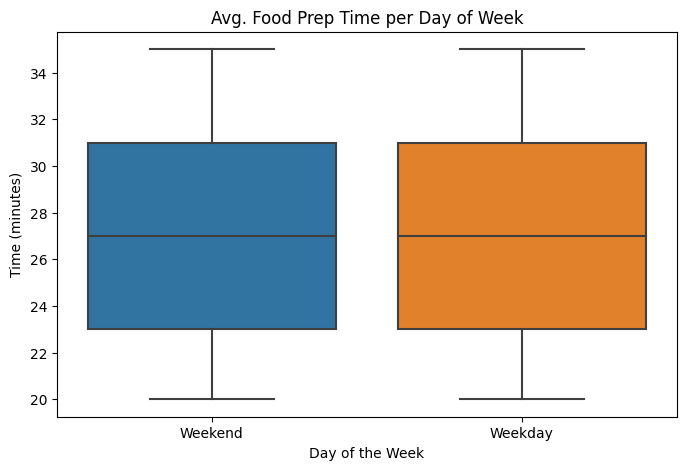

In [ ]:
# create boxplot showing day of week vs food prep time
plt.figure(figsize=(8,5))
d_time = sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')
d_time.set(title='Avg. Food Prep Time per Day of Week', xlabel='Day of the Week', ylabel='Time (minutes)')
plt.show()

####Cost of the Order vs Restaurant Name (Revenue)

In [ ]:
# Get top and bottom 10 restaurants based on order cost
top_10 = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(10)
bottom_10 = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).tail(10)

# Convert both series to lists
top_10_list = top_10.items()
bottom_10_list = bottom_10.items()

# Printing the headers
print(f"{'Top Restaurants':<30} {'Cost':<15} {'Bottom Restaurants':<30} {'Cost':<15}")
print('-' * 83)  # printing a divider

# Iterate over the items in top_14 and bottom_14 lists and print side by side
for (top_name, top_cost), (bottom_name, bottom_cost) in zip(top_10_list, bottom_10_list):
    print(f"{top_name:<30} {top_cost:<15.2f} {bottom_name:<30} {bottom_cost:.2f}")


Top Restaurants                Cost            Bottom Restaurants             Cost           
-----------------------------------------------------------------------------------
Shake Shack                    3579.53         Gaia Italian Cafe              8.78
The Meatball Shop              2145.21         Chola Eclectic Indian Cuisine  8.73
Blue Ribbon Sushi              1903.95         Woorijip                       8.25
Blue Ribbon Fried Chicken      1662.29         'wichcraft                     8.10
Parm                           1112.76         La Follia                      8.05
RedFarm Broadway               965.13          Market Table                   6.79
RedFarm Hudson                 921.21          Wa Jeal                        6.74
TAO                            834.50          Cipriani Le Specialita         5.92
Han Dynasty                    755.29          Big Wong Restaurant _¤¾Ñ¼     5.92
Blue Ribbon Sushi Bar & Grill  666.62          Hunan Manor                 

#####Observations:
* The restaurants with the most reveneue are the same as the restaurants with the highest number of orders.
* The "Shake Shack" has the highest gross revenue
* "Hunan Manor" had the least gross revenue


####Rating vs Delivery Time

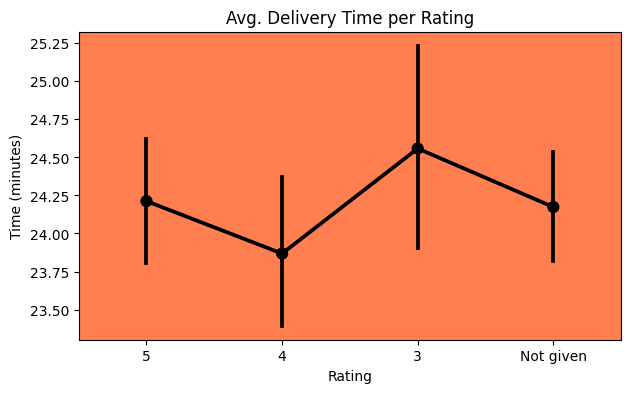

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(7, 4))
deliverytime_rating = sns.pointplot(data=df, x='rating', y='delivery_time', color='black', order=('5', '4', '3', 'Not given'))
deliverytime_rating.set(title='Avg. Delivery Time per Rating', xlabel='Rating', ylabel='Time (minutes)', facecolor='coral' )
plt.show()

Observations:

* Interstingly, there is no linear correlation between rating given and delivery time.
* While it appears that the lowest rating(s) given correlate to the longest delivery time, the highest rating(s) given do not generally corelate to the fastest delivery times.
* There is a difference of less than 1 minute between the average delivery time for '4' and '3' ratings.
* The confidence intervals for each rating lie roughly within 1 minute
* Additionally, it is noted that the average delivery times for both a '5' rating and ratings which were 'Not given' are roughly the same. This emphasizes the randomness of the data.
* From this plot, we can't say that delivery time affects ratings because there's no clear trend and the average delivery time between ratings is within ~ 1 minute

####Rating vs Food Preparation Time

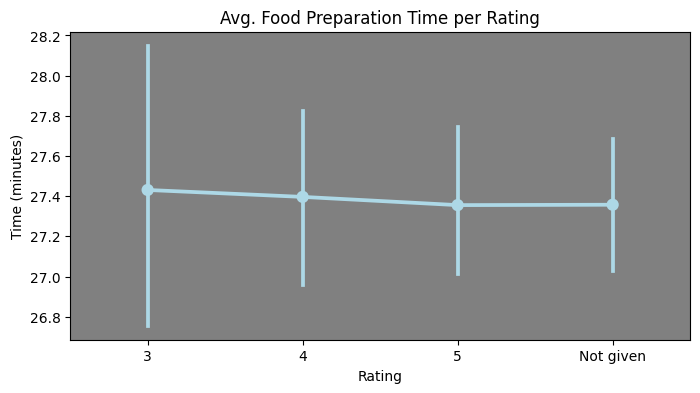

In [ ]:
# create pointplot for rating vs food prep time
plt.figure(figsize=(8,4))
food_prep_rating = sns.pointplot(data=df, x='rating', y='food_preparation_time', color='lightblue', order=('3','4','5', 'Not given'))
food_prep_rating.set(title='Avg. Food Preparation Time per Rating', xlabel='Rating', ylabel='Time (minutes)', facecolor='gray');


Observations:

* We can see a very slight correlatin between the food preparation time and the rating. As food preparation time goes up, the average rating goes down. However, there's only ~ 1/10th of a minute difference between rating categories. That's roughly 6 seconds of change between ratings
* Because orders that received a rating of '5' *and* 'Not given' share nearly the same food preparation time, there appears to be no correlation between food preparation time and the liklihood of receiving a review for the order

####Rating vs The Cost of the Order

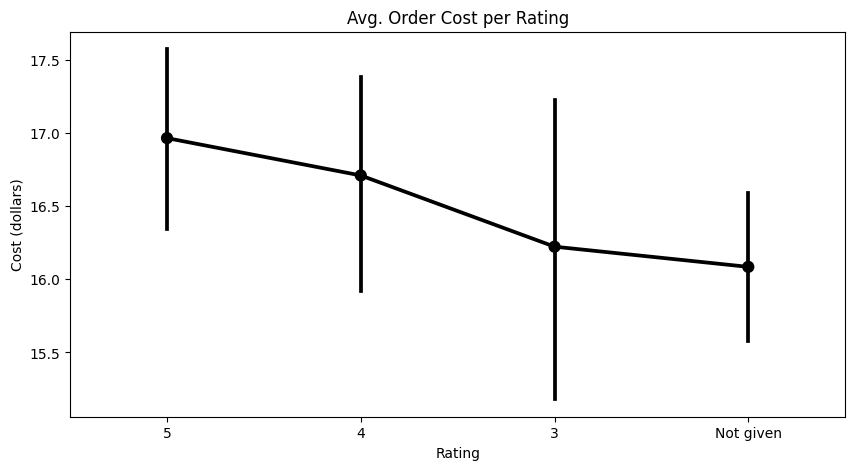

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(10, 5))
cost_per_rating = sns.pointplot(data=df, x='rating', y='cost_of_the_order', color='black', order=('5','4','3','Not given'))
cost_per_rating.set(title='Avg. Order Cost per Rating', xlabel='Rating', ylabel='Cost (dollars)', facecolor='white')
plt.show()

Observations:

* There is a positive correlation between the cost of the order and the rating. As the cost goes up, the rating also goes up. This is surprising and counter-intuitive
* We can check the strength of the correlation with a heatmap

####Rating vs Cuisine Type

For this analysis, we'll use the df_ratings DataFrame and convert the 'rating' data type to int.

In [ ]:
# converting the rating_mew column to Int64 data type
df_ratings['rating_new'] = df_ratings['rating_new'].astype('Int64')

#checking to see that the data type reassignment was successful
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
 9   rating_new             1162 non-null   Int64  
dtypes: Int64(1), float64(1), int64(4), object(4)
memory usage: 101.0+ KB


There are 1,162 ratings across all orders

In [ ]:
# create variable to show total number of ratings per cuisine type
cuisine_ratings_count = df_ratings.groupby('cuisine_type')['rating_new'].count().reset_index()

# sort the results based on number of ratings
cuisine_ratings_count.sort_values(by='rating_new', ascending=False)

,cuisine_type,rating_new
0,American,368
5,Japanese,273
4,Italian,172
1,Chinese,133
3,Indian,50
8,Mexican,48
9,Middle Eastern,34
7,Mediterranean,32
10,Southern,13
2,French,10


#####Observations:
* American food has the most ratings
* Vietnamese has the least amount of ratings

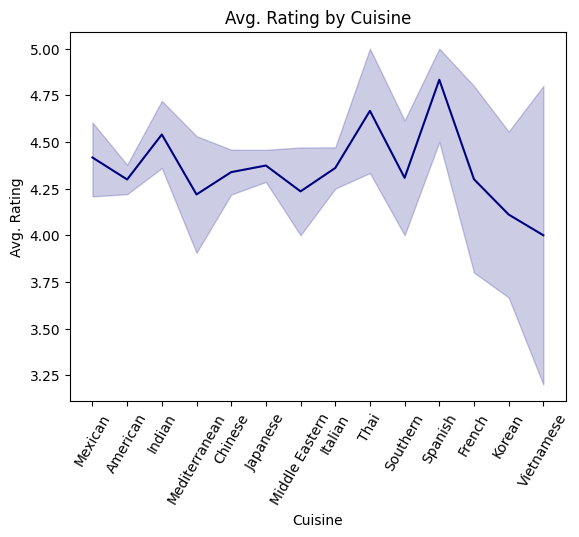

In [ ]:
# use a lineplot to visualize the average rating by cuisine type
avg_rating_cuisine = sns.lineplot(data=df_ratings, x='cuisine_type', y='rating_new', color='navy')
avg_rating_cuisine.set(title='Avg. Rating by Cuisine', xlabel='Cuisine', ylabel='Avg. Rating')
plt.xticks(rotation=60);

#####Observations:
* We can see that Spanish food is rated the highest at **4.8/5.0**
* Vietnamese food ranks the lowest at **4.0/5.0**

In [ ]:
# create variable to show average rating per cuisine type
cuisine_ratings_mean = df_ratings.groupby('cuisine_type')['rating_new'].mean().reset_index()
# sort the results based on average rating
cuisine_ratings_mean.sort_values(by='rating_new', ascending=False)

,cuisine_type,rating_new
11,Spanish,4.833
12,Thai,4.667
3,Indian,4.540
8,Mexican,4.417
5,Japanese,4.374
4,Italian,4.360
1,Chinese,4.338
10,Southern,4.308
2,French,4.300
0,American,4.299


#####Observations:
* Here is another view (ordered rank) of ratings by cuisine type.
* Note that the most frequently purchased cuisine type has an average rating near the bottom half of cuisines types

In [ ]:
# Let's view the percentages of ratings per cuisine type
# create variable for total number of ratings
total_ratings = df_ratings['rating_new'].sum()
# calculate the percentage total of ratings for each cuisine type
df_ratings['percentage'] = (df_ratings['rating_new'] / total_ratings) * 100
# output a DataFrame that shows the results
df_ratings.groupby('cuisine_type')['percentage'].sum().reset_index().sort_values(by='percentage', ascending=False)




,cuisine_type,percentage
0,American,31.339
5,Japanese,23.653
4,Italian,14.857
1,Chinese,11.430
3,Indian,4.497
8,Mexican,4.200
9,Middle Eastern,2.853
7,Mediterranean,2.674
10,Southern,1.109
2,French,0.852


#####Observations:
* Individually: French, Korean, Thai, Spanish, and Vietnamese each account for less than 1% of all ratings
* The highest number of ratings (American, Japanese, Chinese, Italian) are consistent with our results from the highest number of orders by cuisine type

####Ratings by Day of The Week

In [ ]:
# display average ratings by day of the week
df_ratings.groupby('day_of_the_week')['rating_new'].mean()

day_of_the_week
Weekday   4.309
Weekend   4.359
Name: rating_new, dtype: Float64

#####Observations:
* There's only a half of a percentage point difference between ratings based on day_of_the_week

###Heatmap of Numerical values

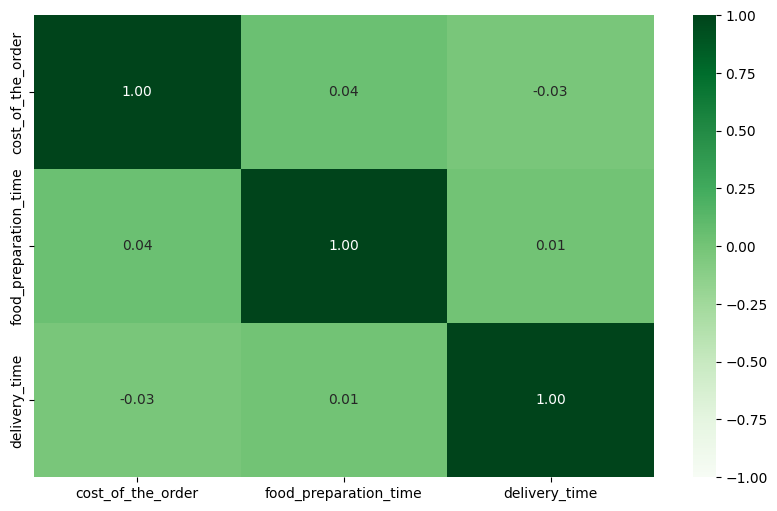

In [ ]:
# Plot a heatmap of the numerical values in the 'df' DataFrame
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(10, 6))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Greens")
plt.show()

Observations:

* This correlation (heat) map doesn't show any strong correlations between variables.

**Let's create a new dataframe with modified columns**

In [ ]:
# tell pandas to only show 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# create a new column for total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
total_time = (df['total_time'].sum())

# create a new DataFrame from a copy of the dataset
df_restaurants = df.copy()

# add columns to the new DataFrame
# this DataFrame will have have one row for each restaurant
df_restaurants = df_restaurants[['restaurant_name']].drop_duplicates().reset_index(drop=True) # remove duplicate restaurants
df_restaurants['total_orders'] = df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['order_id'].count())
df_restaurants['total_revenue'] = df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['cost_of_the_order'].sum())
df_restaurants['avg_ordercost'] = df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['cost_of_the_order'].mean())
df_restaurants['avg_deliverytime'] = (df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['total_time'].mean()))

df_restaurants.head()

,restaurant_name,total_orders,total_revenue,avg_ordercost,avg_deliverytime
0,Hangawi,2,37.49,18.75,44.00
1,Blue Ribbon Sushi Izakaya,29,485.09,16.73,52.21
2,Cafe Habana,16,217.31,13.58,52.31
3,Blue Ribbon Fried Chicken,96,1662.29,17.32,51.34
4,Dirty Bird to Go,4,55.25,13.81,48.00


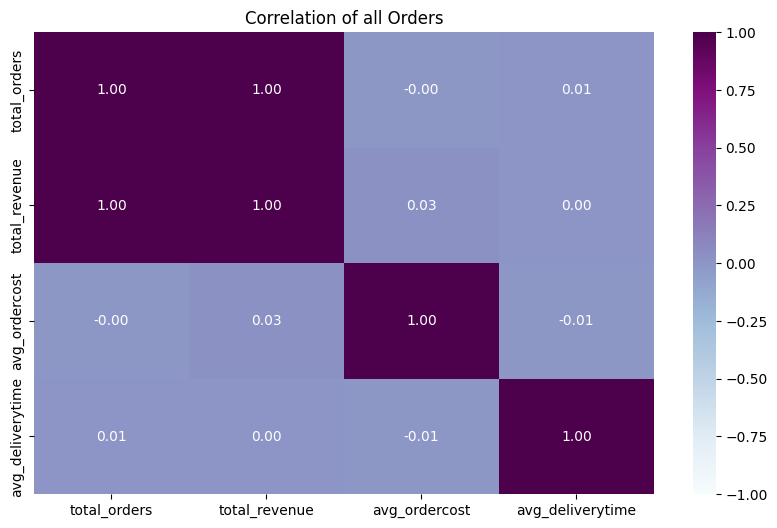

In [ ]:
# Plot a heatmap of these variables
col_list = ['total_orders', 'total_revenue', 'avg_ordercost', 'avg_deliverytime']
plt.figure(figsize=(10, 6))
heatmap_1 = sns.heatmap(df_restaurants[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="BuPu")
heatmap_1.set(title='Correlation of all Orders')
plt.show()

#####Observations:
* As expected, there is a direct correlation between the number of orders received and the total revenue for a restaurant (1.00)

**Let's modify the DataFrame further to remove orders that were not rated and then include the average rating**

In [ ]:
# tell pandas to only show 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)

# create a new DataFrame from a copy of the dataset
df_restaurants = df_ratings.copy()

# add columns to the new DataFrame
# this DataFrame will have have one row for each restaurant
df_restaurants = df_restaurants[['restaurant_name']].drop_duplicates().reset_index(drop=True) # remove duplicate restaurants
df_restaurants['total_orders'] = df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['order_id'].count())
df_restaurants['total_revenue'] = df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['cost_of_the_order'].sum())
df_restaurants['avg_ordercost'] = df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['cost_of_the_order'].mean())
df_restaurants['avg_total_delivery_time'] = (df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['total_time'].mean()))
df_restaurants['avg_foodprep_time'] = (df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['food_preparation_time'].mean()))
df_restaurants['avg_delivery_time'] = (df_restaurants['restaurant_name'].apply(lambda x: df[df['restaurant_name'] == x]['delivery_time'].mean()))
df_restaurants['avg_rating'] = (df_restaurants['restaurant_name'].apply(lambda x: df_ratings[df_ratings['restaurant_name'] == x]['rating_new'].mean()))



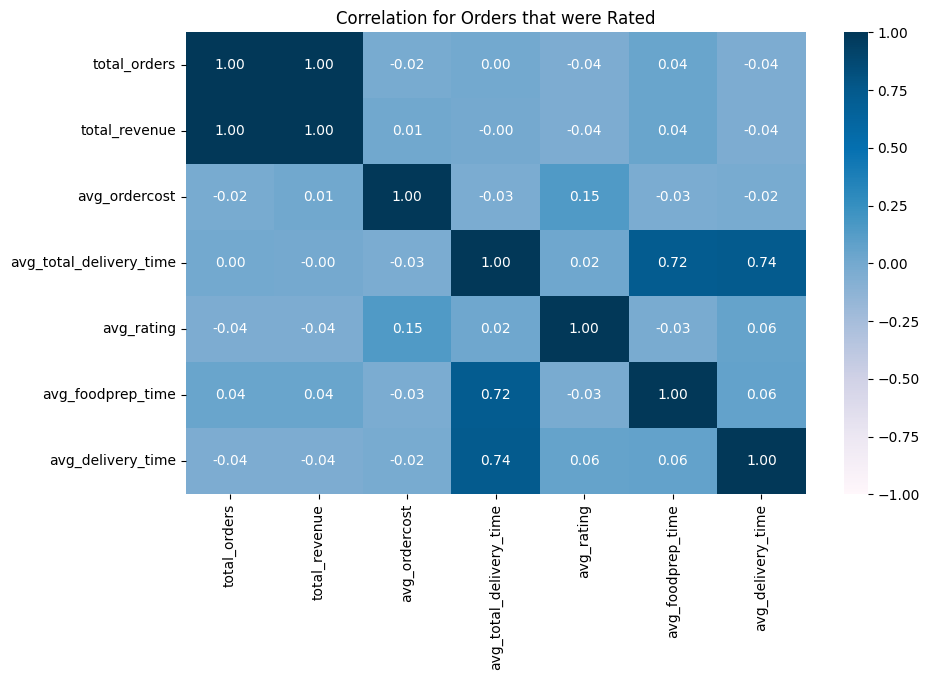

In [ ]:
# Plot a heatmap of these variables
col_list = ['total_orders', 'total_revenue', 'avg_ordercost', 'avg_total_delivery_time', 'avg_rating', 'avg_foodprep_time', 'avg_delivery_time']
plt.figure(figsize=(10, 6))
heat_2 = sns.heatmap(df_restaurants[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="PuBu")
heat_2.set(title='Correlation for Orders that were Rated')
plt.show()

#####Observations:
* **rating vs order cost:** This is very surprising. There's a slight, positive correlation between average rating and average order cost (0.15). This means that as the average order cost goes up, so does the average rating!
* **food prep time/delivery vs overall delivery time:** As expected, the combination of food preparation time (0.72) and delivery time (0.74) are (highly) positively corelated to the overall delivery time of an order

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# group retaurants by rating counts in descending order
df_rating_count = df_ratings.groupby(['restaurant_name'])['rating_new'].count().sort_values(ascending=False).reset_index()

# create a DataFrame that includes only restaurants with more than 50 ratings
rest_names = df_rating_count[df_rating_count['rating_new']>50]['restaurant_name']

# filter the out restaurant names who do not have more than 50 reviews
df_rating_mean = df_ratings[df_ratings['restaurant_name'].isin(rest_names)].copy()

# display the rating means for all restaurants with more than 50 reviews
df_rating_mean.groupby(['restaurant_name'])['rating_new'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating_new
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### Observations:
* The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi are the only restaurants which meet the promotional criteria.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
#  function to compute the revenue from orders
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
# populate the 'net_revenue' column with calculated data based on compute_rev function
df['net_revenue'] = df['cost_of_the_order'].apply(compute_rev)
"$"f"{df['net_revenue'].sum():,.2f}"

'$6,166.30'

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,net_revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,1.74


This is an alternative function that calculates the same revenue

In [ ]:
# create a copy of the data
df_revenue = df.copy()

# find all revenue from sum of orders that cost between > $5 and <= $20
df_revenue_15 = df_revenue[(df_revenue['cost_of_the_order'] > 5) & (df_revenue['cost_of_the_order'] <= 20)]

# find all revenue from sum of orders that cost more than $20
df_revenue_25 = df_revenue[df_revenue['cost_of_the_order'] > 20]

# calculate net revenue for orders the cost between > $5 and <= $20
netrevenue_15 = df_revenue_15['cost_of_the_order'].sum()
print('The gross total for orders which cost > $5 and <= $20 is',"$"+f"{netrevenue_15:,.2f}")
print('The NET total for orders which cost > $5 and <= $20 is',"$"+f"{netrevenue_15*.15:,.2f}\n")

# calculate net revenue for orders that cost more than $20
netrevenue_25 = df_revenue_25['cost_of_the_order'].sum()
print('The gross total for orders which cost more than $20 is',"$"+f"{netrevenue_25:,.2f}")
print('The NET total for orders which cost more than $20 is',"$"+f"{netrevenue_25*.25:,.2f}\n")

# calculate total net revenue
net_revenue = ("$"+f"{netrevenue_25 *.25 + netrevenue_15 *.15:,.2f}")

print('The net revenue for the business is', net_revenue)

The gross total for orders which cost > $5 and <= $20 is $16,517.17
The NET total for orders which cost > $5 and <= $20 is $2,477.58

The gross total for orders which cost more than $20 is $14,754.91
The NET total for orders which cost more than $20 is $3,688.73

The net revenue for the business is $6,166.30


#### Observations:

* The net revenue generated to the business is **$6,166.30**


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:

# we've already created a column that combines preparation and delivery times
print('There is a total of', f"{total_time:,}", 'delivery minutes')

# calculate number of orders with delivery times greater than 60 minutes
ordersabove60 = (df['total_time'][df['total_time'] > 60].count())

# calculating percentage of total orders for delivery times greater than 60 minutes
percent_ordersabove60 = ordersabove60/df.shape[0] * 100
print(f"{percent_ordersabove60:.2f}", '% of all orders took longer than 60 minutes to deliver')




There is a total of 97,811 delivery minutes
10.54 % of all orders took longer than 60 minutes to deliver


Observations:
* A total of **10.54%** of all orders took longer than 60 minutes to deliver

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# find the mean delivery time for both weekends and weekdays
weekday_mean_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print('The mean delivery time on weekends is', round(weekend_mean_delivery_time,2),'minutes\n')
print('The mean delivery time on weekdays is', round(weekday_mean_delivery_time,2),'minutes\n')

# calculate the percent difference between delivery time on weekends and weekdays
percent_diff = (weekday_mean_delivery_time - weekend_mean_delivery_time) / weekend_mean_delivery_time * 100
print('This is a', round(percent_diff, 2), '% increase')

The mean delivery time on weekends is 22.47 minutes

The mean delivery time on weekdays is 28.34 minutes

This is a 26.12 % increase


Observations:

* The on average, deliveries take 26.12% longer on the weekdays.
* As speculation: this could be due to staff changes, changes in traffic patterns, the difference in order volume, or some other factor

### **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
*  (1) **Weekend/Weekday order Frequency:**
  * Weekends recieve an average of 6 times as many orders as placed during the weekday.
  * There is no timeline associated with the data provided. Were these 1,898 orders collected within 2 days (e.g. a Friday and Saturday, combined) or over a span of months? The answer to this question will affect the perception of these data points
* (2) **Ratings**:
  * About 60% of orders were rated by consumers
  * There were no "1" or "2" ratings given
  * Ratings do not seem to be correlated to delivery times.
  * There is some indication that ratings improve with higher order costs
* (3) **Order Costs**: (avg. order cost is ~\$14)
  * Most orders cost less than $15
  
  * Less than 30% of orders are priced high enough to qualify for the 25% revenue margin
  * Less than .5% of orders are priced low enough to generate $0 revenue
  * This means that 70% of all orders generate a 15% revenue margin
* (4) **Cuisine Popularilty**:
  * Almost 80% of all orders were given to 4 (out of 14) cuisines types
* (5) **Delivery Times**:
  * Total delivery time is dependant on food preparation time and actual delivery time.
    * The food preparation time is the same for both weekends and weekdays
    * However, actual delivery time takes (on average)  5.5 minutes longer on Weekdays (when there are less orders)

### Recommendations:

* (1) We need to collect more information about why there's such a large difference in order frequency between weekdays and weekends.
* (2) We need to collect more data via customer sentiment. Incentivize consumers to provide more detail about what they liked and did not like in their experience
* (3) The business needs to drive upsells to get average order costs above \$20. This will significantly increase net revenue (and may also increase average ratings). However, this could reduce total orders placed if there is a negative correlation between prices over $15 and order overall order sales.
  * The business might need to choose between driving the average cost of orders up to \$20+, or focusing on fulfilling a higher quantity of orders
* (4) Increase marketing to restaurants who specialize in the top 4 preferred cuisines (American, Japanese, Itailian, and Chinese). Let's provide more options to consumers based on preferred tastes.
* (5) We need more data to understand why delivery times are different for weekends/weekdays. Recommend assessing methods to collect the following data:

**Missing/Requested Data**
* Order cancellations (counts, how many minutes passed before cancellation received)
* Confirm that the app allows users to rate experience as either 1 or 2 (check for bugs in software)
* Confirm the timespan of the data. From what period(s) was the data collected?
* Additional (detailed) customer rating feedback:
  * Was the food good?
  * Was the delivery time appropriate?
  * Was the menu sufficient?
  * Other?
* Delivery distance
* Date/Time of order
* How many meals are requested per order (are people generally ordering for one, or more people)?  
* Is the delivery staff resourced the same for weekends and weekdays?
  * Interview the staff to get their insights on why deliveries take longer on weekdays

---

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #SkLearn's package for randomized data splitting function

In [ ]:
df.head()
df = df.drop(['order_id', 'restaurant_name'], axis=1)

,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time,net_revenue
0,337525,Korean,30.75,Weekend,Not given,25,20,45,7.69
1,358141,Japanese,12.08,Weekend,Not given,25,23,48,1.81
2,66393,Mexican,12.23,Weekday,5,23,28,51,1.83
3,106968,American,29.20,Weekend,3,25,15,40,7.30
4,76942,American,11.59,Weekday,4,25,24,49,1.74


In [ ]:
df = pd.get_dummies(df, columns=['cuisine_type', 'day_of_the_week', 'rating'])
df = df.drop(['rating_Not given'], axis=1)
df.head()

,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time,net_revenue,cuisine_type_American,cuisine_type_Chinese,cuisine_type_French,cuisine_type_Indian,...,cuisine_type_Middle Eastern,cuisine_type_Southern,cuisine_type_Spanish,cuisine_type_Thai,cuisine_type_Vietnamese,day_of_the_week_Weekday,day_of_the_week_Weekend,rating_3,rating_4,rating_5
0,337525,30.75,25,20,45,7.69,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,358141,12.08,25,23,48,1.81,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66393,12.23,23,28,51,1.83,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,106968,29.20,25,15,40,7.30,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,76942,11.59,25,24,49,1.74,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
#check data types
df.dtypes

customer_id                      int64
cost_of_the_order              float64
food_preparation_time            int64
delivery_time                    int64
total_time                       int64
net_revenue                    float64
cuisine_type_American            uint8
cuisine_type_Chinese             uint8
cuisine_type_French              uint8
cuisine_type_Indian              uint8
cuisine_type_Italian             uint8
cuisine_type_Japanese            uint8
cuisine_type_Korean              uint8
cuisine_type_Mediterranean       uint8
cuisine_type_Mexican             uint8
cuisine_type_Middle Eastern      uint8
cuisine_type_Southern            uint8
cuisine_type_Spanish             uint8
cuisine_type_Thai                uint8
cuisine_type_Vietnamese          uint8
day_of_the_week_Weekday          uint8
day_of_the_week_Weekend          uint8
rating_3                         uint8
rating_4                         uint8
rating_5                         uint8
dtype: object

In [ ]:
X = df.drop(['cost_of_the_order'], axis=1)
# the dependant variable
y = df['cost_of_the_order']

In [ ]:
# split x and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
customer_id,-0.00
food_preparation_time,0.01
delivery_time,-0.01
total_time,0.00
net_revenue,3.18
cuisine_type_American,-0.09
cuisine_type_Chinese,-0.06
cuisine_type_French,0.38
cuisine_type_Indian,-0.05
cuisine_type_Italian,0.06


In [ ]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is", intercept)

The intercept for our model is 6.082982041707636


In [ ]:
regression_model.score(X_train, y_train)

0.9471329925957563

In [ ]:
regression_model.score(X_test, y_test)

0.9468706270710059

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

# In sample training, R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9505883582717498


In [ ]:
X_train2.shape

(1328, 301)

In [ ]:
Equation = "Price = " + str(regression_model.intercept_)
print(Equation, end=" ")

for i in range(len(X_train.columns)):
    if i != len(X_train.columns) - 1:
        print(
            "+ (",
            regression_model.coef_[i],
            ")*(",
            X_train.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", regression_model.coef_[i], ")*(", X_train.columns[i], ")")

Price = 6.082982041707636 + ( -4.2262208803797324e-07 )*( customer_id )  + ( 0.0066142349768203434 )*( food_preparation_time )  + ( -0.006062614394999591 )*( delivery_time )  + ( 0.00055162058182026 )*( total_time )  + ( 3.183121695674687 )*( net_revenue )  + ( -0.08586318343929501 )*( cuisine_type_American )  + ( -0.056802603022077756 )*( cuisine_type_Chinese )  + ( 0.3782884434747861 )*( cuisine_type_French )  + ( -0.04996747793176619 )*( cuisine_type_Indian )  + ( 0.06227315321316668 )*( cuisine_type_Italian )  + ( 0.2247346677480618 )*( cuisine_type_Japanese )  + ( 0.5613083698211137 )*( cuisine_type_Korean )  + ( -0.4073567514985413 )*( cuisine_type_Mediterranean )  + ( 0.26717779466424285 )*( cuisine_type_Mexican )  + ( 0.23309445947184193 )*( cuisine_type_Middle Eastern )  + ( 0.09710201160216363 )*( cuisine_type_Southern )  + ( -0.16074643118173787 )*( cuisine_type_Spanish )  + ( -0.09123333334232434 )*( cuisine_type_Thai )  + ( -0.9720091195796364 )*( cuisine_type_Vietnamese )